In [1]:
# download the libraries
import pandas as pd
from pandas import Series,DataFrame
import warnings
import os
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn cufflinks plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import random
from pandas.io.json import json_normalize
%matplotlib inline

In [2]:
df_train = pd.read_pickle('train_flat_no_hits.pkl')

In [3]:
df_train.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,customDimension.index,customDimension.value
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,EMEA
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,North America
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,North America
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,EMEA
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Central America


In [5]:
df_train.isnull().sum().sort_values(ascending = False)

trafficSource.campaignCode                           1708336
totals.transactionRevenue                            1689823
totals.totalTransactionRevenue                       1689823
totals.transactions                                  1689778
trafficSource.adContent                              1643600
trafficSource.adwordsClickInfo.isVideoAd             1633063
trafficSource.adwordsClickInfo.adNetworkType         1633063
trafficSource.adwordsClickInfo.slot                  1633063
trafficSource.adwordsClickInfo.page                  1633063
trafficSource.adwordsClickInfo.gclId                 1632914
trafficSource.isTrueDirect                           1173819
trafficSource.referralPath                           1142073
trafficSource.keyword                                1052780
totals.timeOnSite                                     874294
totals.bounces                                        836759
totals.sessionQualityDim                              835274
totals.newVisits        

In [4]:
df_train['date'] = pd.to_datetime(df_train["date"], format="%Y%m%d") #convert to datetime
df_train['year'] = df_train['date'].dt.year #for year
df_train['day'] = df_train.date.dt.day_name() #for day
df_train['week'] = df_train.date.dt.weekofyear #week
df_train['month'] = df_train.date.dt.month_name() #month

In [5]:
df_train.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode,customDimension.index,customDimension.value,year,day,week,month
0,Organic Search,2017-10-16,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
1,Referral,2017-10-16,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
2,Direct,2017-10-16,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,North America,2017,Monday,42,October
3,Organic Search,2017-10-16,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,EMEA,2017,Monday,42,October
4,Organic Search,2017-10-16,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,4,Central America,2017,Monday,42,October


In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 60 columns):
 #   Column                                             Dtype         
---  ------                                             -----         
 0   channelGrouping                                    object        
 1   date                                               datetime64[ns]
 2   fullVisitorId                                      object        
 3   socialEngagementType                               object        
 4   visitId                                            int64         
 5   visitNumber                                        int64         
 6   visitStartTime                                     int64         
 7   device.browser                                     object        
 8   device.browserVersion                              object        
 9   device.browserSize                                 object        
 10  device.operatingSystem        

In [26]:
df_train['device.browser']

0                  Firefox
1                   Chrome
2                   Chrome
3                   Chrome
4                   Chrome
                ...       
1708332             Chrome
1708333             Chrome
1708334    Android Webview
1708335             Chrome
1708336             Chrome
Name: device.browser, Length: 1708337, dtype: object

In [21]:
df_train.isna().sum().sort_values(ascending = False)

trafficSource.campaignCode        1708336
totals.transactionRevenue         1689823
totals.totalTransactionRevenue    1689823
totals.transactions               1689778
trafficSource.adContent           1643600
                                   ...   
geoNetwork.metro                        0
geoNetwork.region                       0
geoNetwork.country                      0
geoNetwork.subContinent                 0
channelGrouping                         0
Length: 64, dtype: int64

In [22]:
df_train['totals.transactionRevenue'].value_counts()

16990000     308
19990000     248
39980000     220
18990000     219
21990000     211
            ... 
171150000      1
106660000      1
242970000      1
18450000       1
824680000      1
Name: totals.transactionRevenue, Length: 7251, dtype: int64

In [6]:
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].astype('float')

In [10]:
df_train["totals.transactionRevenue"]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1708332    0.0
1708333    0.0
1708334    0.0
1708335    0.0
1708336    0.0
Name: totals.transactionRevenue, Length: 1708337, dtype: float64

In [9]:
df_train["totals.transactionRevenue"] = df_train["totals.transactionRevenue"].fillna(0.0).astype(float)

In [12]:
df_train["totals.transactionRevenue"].isna().sum()

0

In [13]:
df_train["totals.transactionRevenue"].isnull().sum()

0

In [15]:
print("Transaction Revenue Mean Value: ", df_train['totals.transactionRevenue'].mean())
print("Transaction Revenue median Value: ", df_train['totals.transactionRevenue'].median())

Transaction Revenue Mean Value:  1355906.3463473541
Transaction Revenue median Value:  0.0


In [21]:
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value of above 0
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value of above 0

Transaction Revenue Mean Value:  125113156.53019337
Transaction Revenue Median Value:  46060000.0


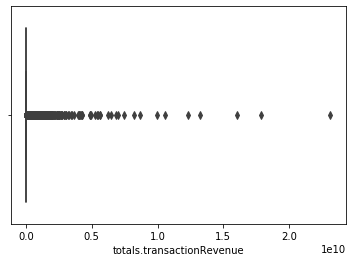

In [20]:
sns.boxplot(df_train["totals.transactionRevenue"])

In [22]:
df_train['device.browser'].value_counts() #users per device browser

Chrome                                                  1173056
Safari                                                   312165
Firefox                                                   63845
Internet Explorer                                         35474
Android Webview                                           34266
                                                         ...   
;__CT_JOB_ID__:a24a8978-e5e8-4dc9-af66-c4ed89ea25d7;          1
starmaker                                                     1
wncrmxukofqljsgvzahiybpdet                                    1
;__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;          1
;__CT_JOB_ID__:65da7e5f-0f05-4b5d-8d31-1f4d470a2b82;          1
Name: device.browser, Length: 129, dtype: int64

In [23]:
df_train['device.browser'].value_counts()[:10] #users per device browser - Top 10

Chrome               1173056
Safari                312165
Firefox                63845
Internet Explorer      35474
Android Webview        34266
Edge                   20543
Samsung Internet       15792
Opera Mini             15018
Safari (in-app)        14207
Opera                   9585
Name: device.browser, dtype: int64

In [39]:
browser_show = df_train['device.browser'].value_counts()[:10].reset_index()

In [40]:
browser_show

,index,device.browser
0,Chrome,1173056
1,Safari,312165
2,Firefox,63845
3,Internet Explorer,35474
4,Android Webview,34266
5,Edge,20543
6,Samsung Internet,15792
7,Opera Mini,15018
8,Safari (in-app),14207
9,Opera,9585


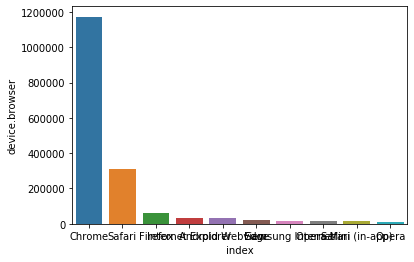

In [42]:
sns.barplot(x ='index', y= 'device.browser', data = browser_show)

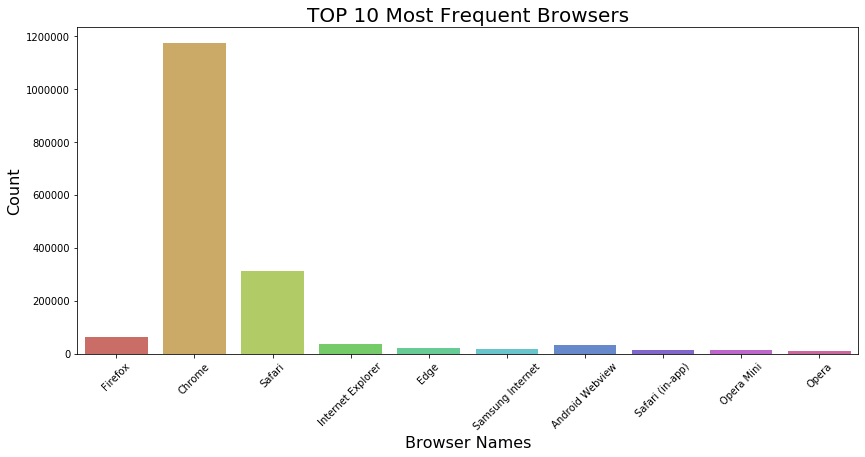

In [43]:

plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [67]:
by_day = df_train.groupby(['day'])['visitId'].count().reset_index()
by_day

,day,visitId
0,Friday,239216
1,Monday,264168
2,Saturday,183999
3,Sunday,191115
4,Thursday,268463
5,Tuesday,279675
6,Wednesday,281701


In [76]:
by_month = df_train.groupby(['month'])['visitId'].count().reset_index()
by_month

,month,visitId
0,April,149727
1,August,159561
2,December,176228
3,February,145196
4,January,148084
5,July,71812
6,June,63578
7,March,164020
8,May,65371
9,November,207661


In [70]:
by_week = df_train.groupby(['week'])['visitId'].count().sort_values(ascending = False)
by_week
by_week_top_10 = by_week.head(10).reset_index()
by_week_top_10

,week,visitId
0,50,53842
1,48,50163
2,46,49175
3,45,48982
4,40,48555
5,43,47509
6,47,45931
7,42,45577
8,44,44981
9,49,41914


In [78]:
by_year = df_train.groupby(['year'])['visitId'].count().reset_index()
by_year

,year,visitId
0,2016,436393
1,2017,928860
2,2018,343084


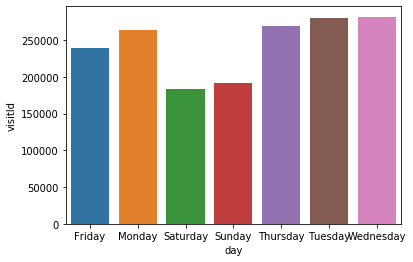

In [72]:
sns.barplot(x ='day', y= 'visitId', data = by_day)

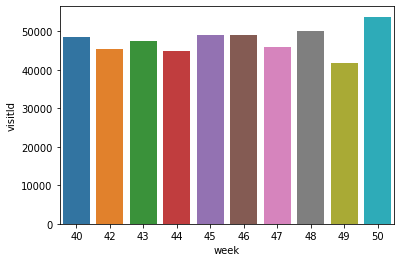

In [73]:
sns.barplot(x ='week', y= 'visitId', data = by_week_top_10)

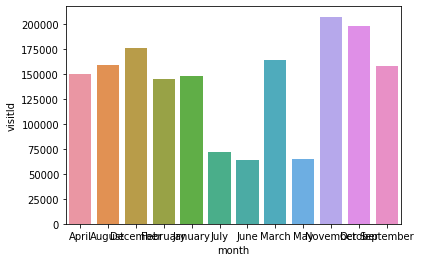

In [77]:
sns.barplot(x ='month', y= 'visitId', data = by_month)

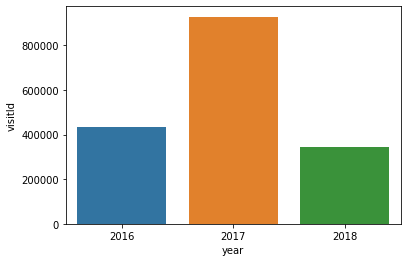

In [79]:
sns.barplot(x ='year', y= 'visitId', data = by_year)